# 07wk-028: 아이스크림(초코/바닐라)2, 교호작용

최규빈  
2023-10-16

# 1. 강의영상

[????](????)

# 2. Imports

In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn.linear_model 
import sklearn.tree
import sklearn.model_selection
import graphviz

# 3. Data

In [2]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()
choco = 40 + temp * 2.0 + np.random.randn(100)*3
vanilla = 20 + temp * 5.0 + np.random.randn(100)*3

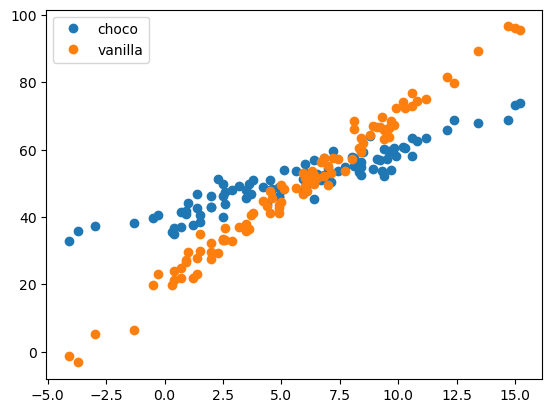

In [34]:
plt.plot(temp,choco,'o',label='choco')
plt.plot(temp,vanilla,'o',label='vanilla')
plt.legend()

-   초코보다 바닐라맛이 기온의 영향을 많이 받아보임

In [4]:
df1 = pd.DataFrame({'temp':temp,'sales':choco}).assign(type='choco')
df2 = pd.DataFrame({'temp':temp,'sales':vanilla}).assign(type='vanilla')
df = pd.concat([df1,df2])
df

# 5. 분석2

`-` 모형을 아래와 같이 본다.

-   ${\bf X}$: `temp`, `type`, `temp` $\times$ `type`
-   ${\bf y}$: `sales`

> Note: 초코/바닐라에 대한 절편차이는 `type`로, 초코/바닐라에 대한
> 기울기 차이는 `temp`$\times$`type`로 표현한다.

In [30]:
# step1
X = pd.get_dummies(df[['temp','type']])
y = df['sales']
# step2 
predictr = sklearn.tree.DecisionTreeRegressor()
# step3
predictr.fit(X,y)
# step4 
yhat = predictr.predict(X)

In [31]:
df['sales_hat'] = yhat
df

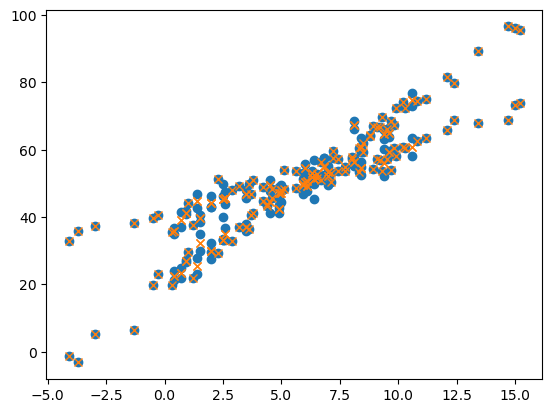

In [32]:
plt.plot(df.temp,df.sales,'o')
plt.plot(df.temp,df.sales_hat,'x')

-   느낌이 싸함..

In [33]:
print(sklearn.tree.export_text(predictr,feature_names=X.columns))

|--- temp <= 5.05
|   |--- type_vanilla <= 0.50
|   |   |--- temp <= 1.75
|   |   |   |--- temp <= 0.80
|   |   |   |   |--- temp <= -3.90
|   |   |   |   |   |--- value: [32.95]
|   |   |   |   |--- temp >  -3.90
|   |   |   |   |   |--- temp <= 0.55
|   |   |   |   |   |   |--- temp <= 0.00
|   |   |   |   |   |   |   |--- temp <= -0.90
|   |   |   |   |   |   |   |   |--- temp <= -3.35
|   |   |   |   |   |   |   |   |   |--- value: [35.85]
|   |   |   |   |   |   |   |   |--- temp >  -3.35
|   |   |   |   |   |   |   |   |   |--- temp <= -2.15
|   |   |   |   |   |   |   |   |   |   |--- value: [37.43]
|   |   |   |   |   |   |   |   |   |--- temp >  -2.15
|   |   |   |   |   |   |   |   |   |   |--- value: [38.32]
|   |   |   |   |   |   |   |--- temp >  -0.90
|   |   |   |   |   |   |   |   |--- temp <= -0.40
|   |   |   |   |   |   |   |   |   |--- value: [39.71]
|   |   |   |   |   |   |   |   |--- temp >  -0.40
|   |   |   |   |   |   |   |   |   |--- value: [40.47]
|   |   | 

In [15]:
dot_data = sklearn.tree.export_graphviz(predictr, 
                      feature_names=predictr.feature_names_in_,  
#                      class_names=predictr.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.